# Skript: Grafiken Formatieren 

---

1. Abbildungsformatierung und Speicherformate
1. Achsenformatierungen und Beschriftungen
2. Hilfslinien und Annotationen
3. Merkblatt: Abbildungselemente

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from matplotlib import ticker  # Hilfsmittel für Achsen-Ticks
from matplotlib.patheffects import withStroke
from matplotlib.pyplot import annotate

# 1. Abbildungsformatierungen und Speicherformate

---

Entscheidend für eine gute Abbildung sind:

* *Abbildungsgröße*:
  * Muss auf das Zielmedium abgestimmt sein. Eine DIN A4 Seite hat z.B. eine feste Breite in `cm`. Ein Bildschirm hat i.d.R. eine feste Auflösung, z.B. 2560 x 1440. Zudem hat auch ein Bildschirm eine "physische" Größe in Form einer Bildschirmdiagonale in Zoll.
  * Matplotlib / seaborn erlaubt uns das festlegen der Abbildungsgröße durch `figsize` ("physische" Größe in Zoll) und `dpi` (dots per inch / pixel pro Zoll). D.h. `figsize` multipliziert mit `dpi` ergibt die Tatsächliche Breite und Höhe der Abbildung in Pixeln.
* *Titel*:
  * Beschreibend und selbsterklärend
* *Speicherformat*:
  * Sollte ebenfalls auf das Zielmedium abgestimmt sein. Digital empfiehlt sich `svg`, da es endlos skalierbar ist, und egal bei welchem Vergrößerungsfaktor immer scharf aussieht. Auf Papiermedien kann ein beliebiges Rasterformat wie `jpg`, `png`, `gif` oder `bmp` verwendet werden.

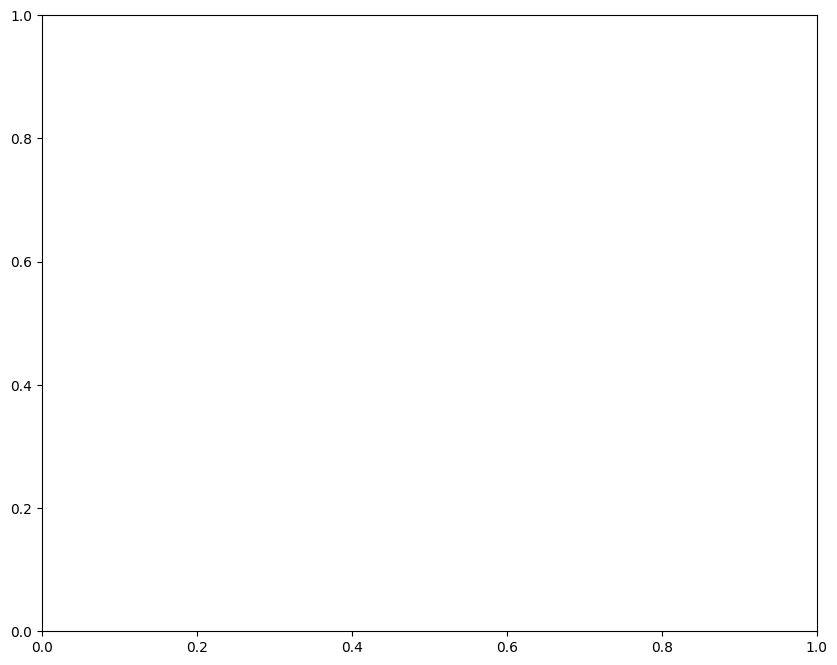

In [2]:
# Einfluss der Auflösung auf Bildgröße
# Hohe Auflösung
# Lese: 10 x 8 Inch bei einer Auflösung von 100 Pixel per Inch
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

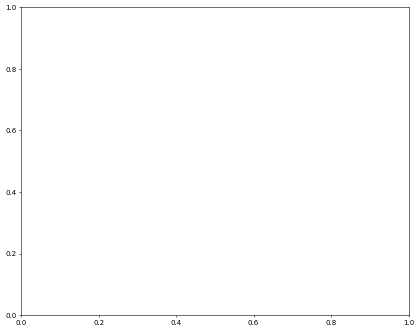

In [3]:
# Geringe Auflösung
fig, ax = plt.subplots(figsize=(10, 8), dpi=50)

In [4]:
# Speicherformat wird anhand der Dateiendung hergeleitet
fig.savefig("testplot.svg")

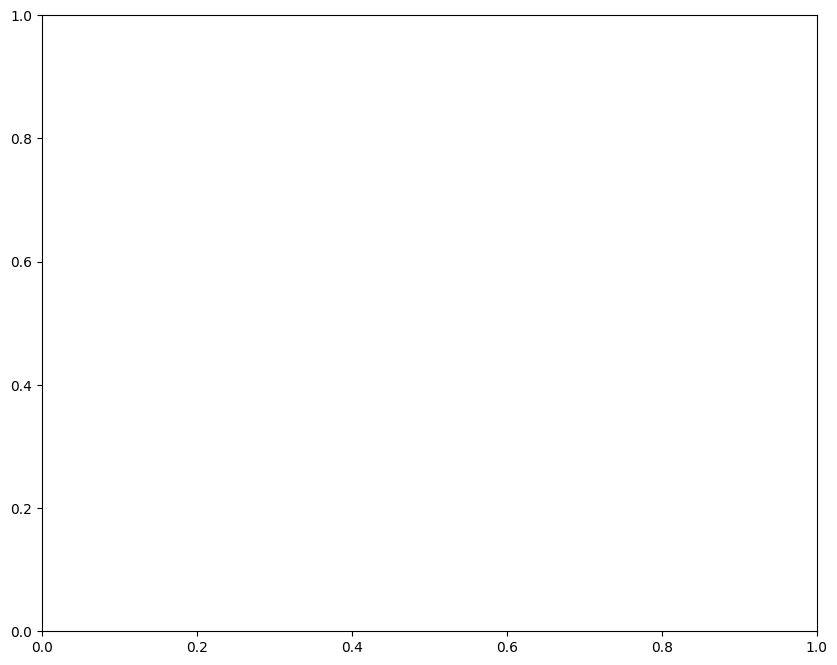

In [5]:
# DPI von 100 ist Standardeinstellung
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
fig.savefig('plot1.png')
# Welche Maße wird das resultierende Bild haben?
# ...

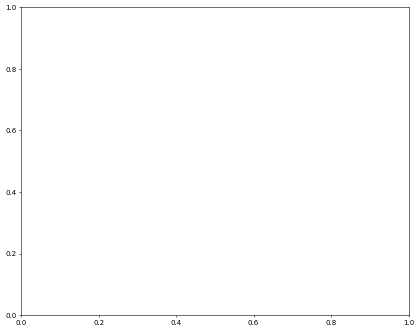

In [6]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=50)
fig.savefig('plot2.png')
# Welche Maße wird dieses Bild haben?
# ...1000x800

In [7]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html

# 2. Achsenformatierungen und Beschriftungen

---


Eine gute Infografik braucht 
* angemesse Beschriftungen
* Geeignete Zahlenformate (z.b. bei Ticks)
  * Bei Währungen: Währungssymbol wie "$" zu verwenden
  * Bei großen Zahlen: Tausend (K), Millionen (M), Milliarden (B) usw. formatieren.
  * Kommazahlen sollten einheitliche Präzision / Dezimalstellen haben und ggf. gerundet werden
  * mehr als 3 Dezimalstellen sind eigentlich nicht nötig. Optimal sind häufig 2 Dezimalstellen. 
  * Prozente sollten als solche formatiert sein
  * Große Zahlen sollten Tausender-Trennzeichen enthalten, d.h. 1000000 sollte als 1.000.000 geschrieben werden (Bzw. 1,000,000 im Englischen).

Alle Beschriftungen sollten eine geeignete Größe erhalten - z.B. `12 pt` bei geschriebenen Berichten (ausgedruckt oder PDF) oder `26 pt` bei Präsentationen. 


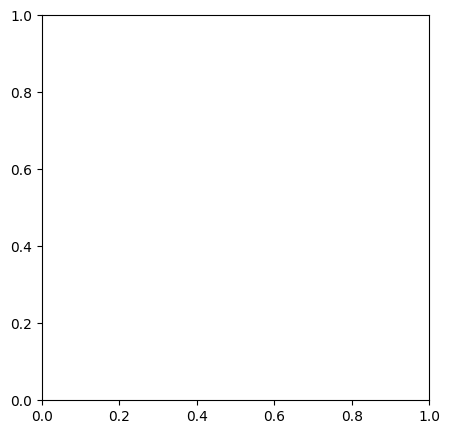

In [8]:
# Erstellen von Figuren/Plots mit Matplotlib:
fig, ax = plt.subplots(figsize=(5, 5))

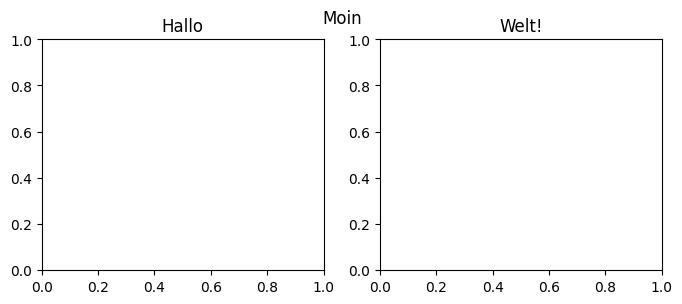

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
							   ncols=2,
							   figsize=(8, 3))
ax1.set_title('Hallo')
ax2.set_title('Welt!')

fig.suptitle("Moin")
plt.show()

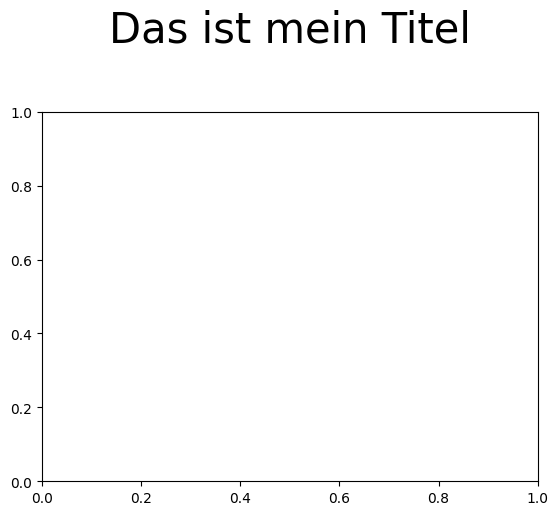

In [10]:
# Titel hinzufügen + Schriftgröße festlegen
plt.title('Das ist mein Titel', fontsize=30, pad=50)
plt.show()
# Quizfrage: Warum funktioniert das hier ohne fig und ax?
# ...

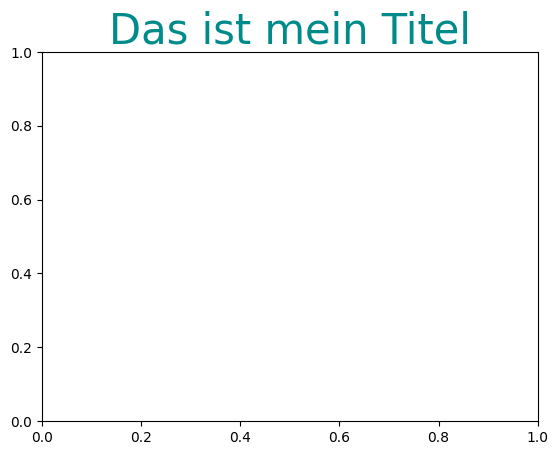

In [11]:
# Titel hinzufügen + Schriftgröße festlegen + Farbe:
plt.title('Das ist mein Titel',
		  fontsize=30,
		  color='darkcyan')
plt.show()

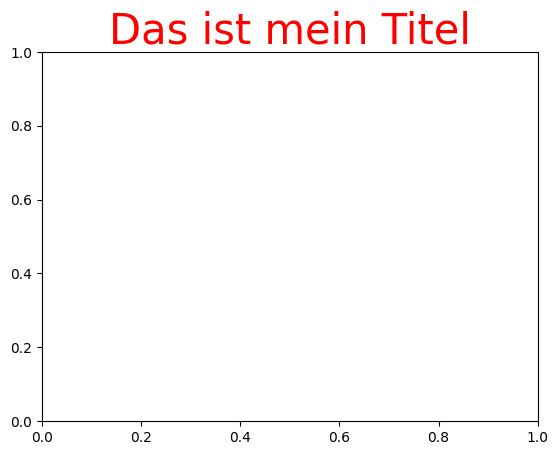

In [12]:
# Farbe mit RGB steuern:
# Rot, Grün, Blau, alle bewegen sich zwischen 0 und 1:
plt.title('Das ist mein Titel',
		  fontsize=30,
		  color=(1, 0, 0))
plt.show()

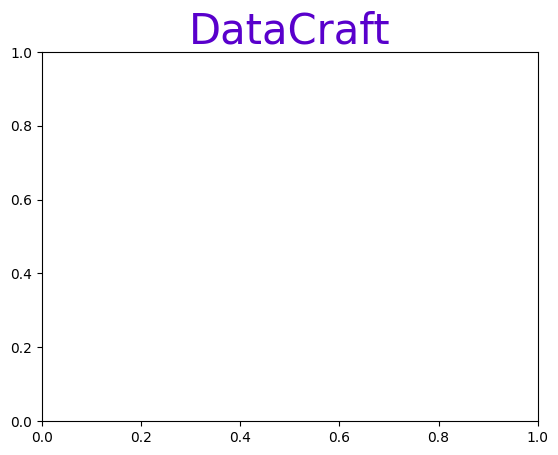

In [13]:
# Mit Colorpicker Farben nachempfinden - Datacraft-Farbe:
# Bsp.: https://www.heise.de/download/product/just-color-picker-71586
plt.title("DataCraft", fontsize=30, color=(0.35, 0.00, 0.80))
plt.show()

In [14]:
# Mehr zu Farben hier: https://matplotlib.org/stable/tutorials/colors/colors.html

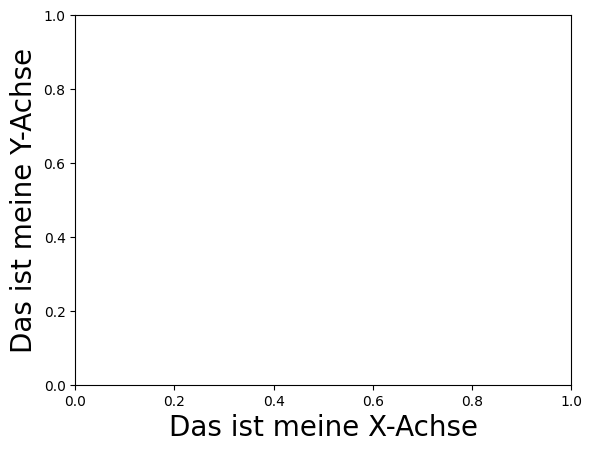

In [15]:
# Achsenbeschriftungen hinzufügen und Größe anpassen
plt.xlabel('Das ist meine X-Achse', fontsize=20)
plt.ylabel('Das ist meine Y-Achse', fontsize=20)
plt.show()

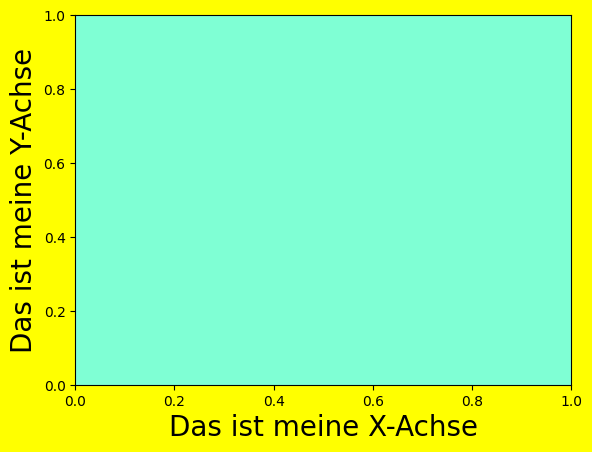

In [16]:
# Figurfarbe einstellen
fig, ax = plt.subplots(facecolor='yellow')
ax.set_xlabel('Das ist meine X-Achse', fontsize=20)
ax.set_ylabel('Das ist meine Y-Achse', fontsize=20)
# Hintergrund des Diagramms färben:
ax.set_facecolor('aquamarine')
plt.show()

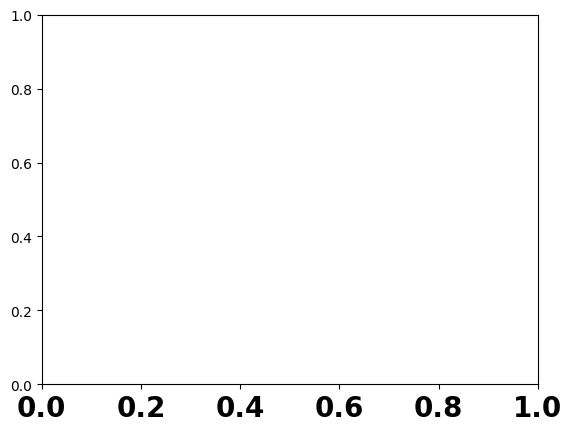

In [17]:
# Tick-Größe und Schriftstil [ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
# Mehr Infos hier: https://matplotlib.org/stable/tutorials/text/text_props.html
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=10, weight='normal')
plt.show()

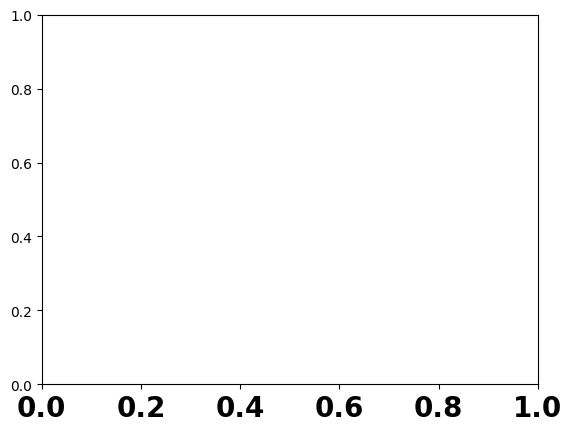

In [18]:
# Alternativ OOP:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=20)
for label in ax.get_xticklabels():
	label.set_weight('bold')

ax.tick_params(axis='y', labelsize=10)
plt.show()

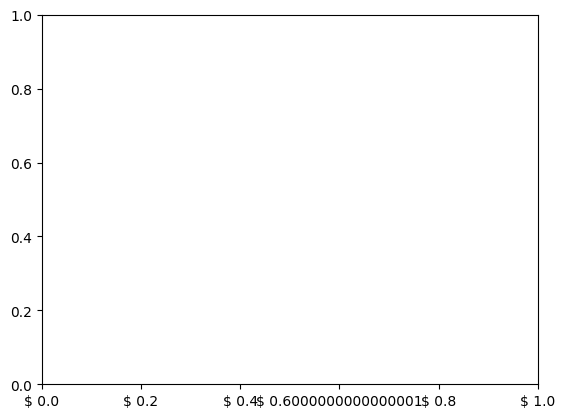

In [19]:
# Formatierung von Ticks in Währung & Co:
# https://www.w3schools.com/python/ref_string_format.asp
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('$ {x}'))

In [20]:
# Hintergrund zum Rundungsfehler: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter09.03-Roundoff-Errors.html#:~:text=This%20has%20a%20side%20effect,is%20called%20round%2Doff%20error.

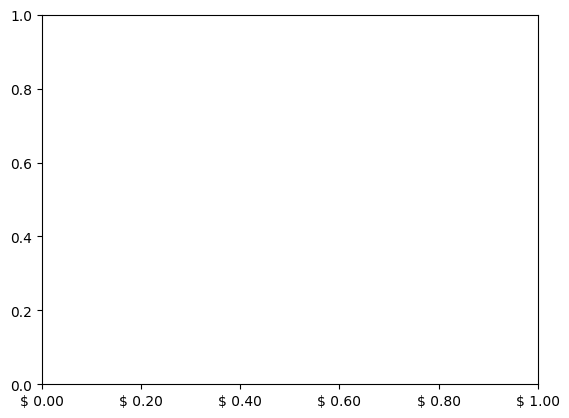

In [21]:
# Das Formatieren von Dezimalstellen.
# Bsp .3f > 3 Nachkommastellen
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('$ {x:.2f}'))

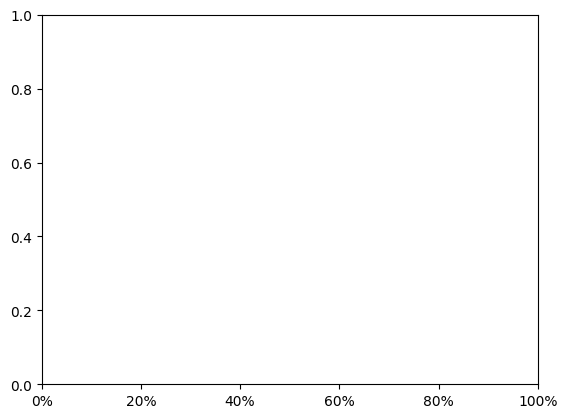

In [22]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

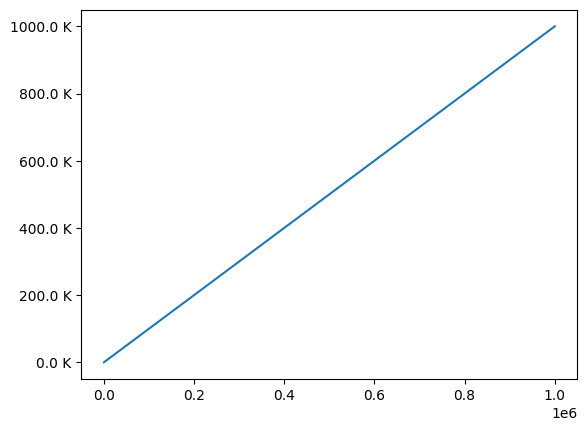

In [23]:
# Zahlen Formatieren z.B.: 10.000 > 10 K
# Hintergrund FuncFormatter: https://matplotlib.org/stable/api/ticker_api.html

fig, ax = plt.subplots()

ax.plot(range(1_000_000))
ax.yaxis.set_major_formatter(
	ticker.FuncFormatter(lambda x, pos: format(x / 1000, '.1f') + ' K')
)

### Miniübung:
Wie schreibt man jetzt die Umwandlung zu Millionen? (mit lambda)
Erstelle hierfür eine Gerade, die 1-10 Millionen enthält!

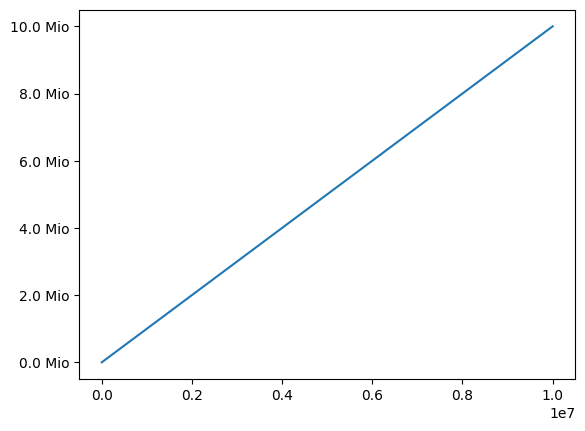

In [46]:
fig, ax = plt.subplots()

ax.plot(range(10_000_000))
ax.yaxis.set_major_formatter(
	ticker.FuncFormatter(lambda x, pos: format(x / 1000000, '.1f') + ' Mio'))

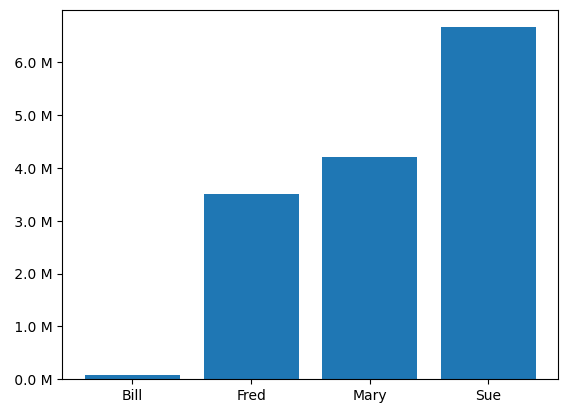

In [25]:
# Ticker einsetzen mit eigens geschriebener Funktion (nicht lambda):
def milliondollar(x, _):
	return f'{x / 1e6: .1f} M'


# Plot erstellen
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

money = [0.815e5, 3.5e6, 4.20e6, 6.66e6]
people = ["Bill", "Fred", "Mary", "Sue"]
ax.bar(people, money)
plt.show()

### Übung:

Dir liegen die Temperaturangaben in **°Fahrenheit** von 6 Städten im Dezember vor:
- Luanda: 78.4
- Guangzhou: 72.3
- Vaduz: 50.2
- Nuuk: 29.5
- Tauranga: 58.6
- Curitiba: 62.2

Erstelle aus diesen Daten einen Barplot, ohne diese Daten vorher in einen DataFrame einzusetzen! Alles, was erlaubt ist, ist die °Fahrenheit in eine Liste anzusetzen; alle weiteren Änderungen müssen über die Formatierungsoptionen erledigt werden. Auf der X-Achse sollen hierbei die Städtenamen erscheinen, auf der y-Achse sollen die **°CELSIUS**-Angaben (du musst also per Formatierung umrechnen!) erscheinen.


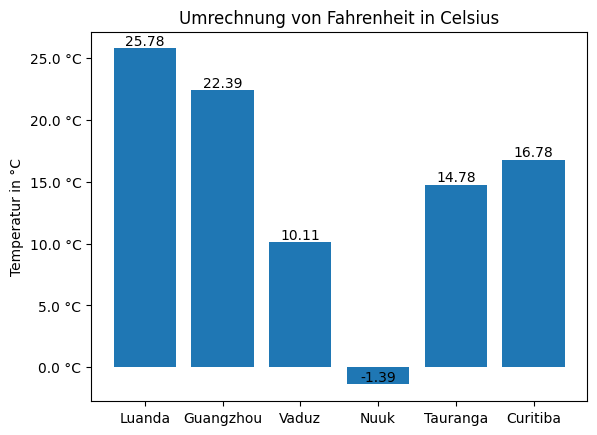

In [67]:
# fig, ax
fig, ax = plt.subplots()

# data
data = {
	"Luanda": 78.4,
	"Guangzhou": 72.3,
	"Vaduz": 50.2,
	"Nuuk": 29.5,
	"Tauranga": 58.6,
	"Curitiba": 62.2
}


# convert
def convert_f_to_c(fahrenheit):
	return (fahrenheit - 32) * 5 / 9


# new data
celsius_data = {city: convert_f_to_c(temp) for city, temp in data.items()}

# bar plot on var
bars = ax.bar(celsius_data.keys(), celsius_data.values())

# settings
ax.set_ylabel("Temperatur in °C")
ax.set_title("Umrechnung von Fahrenheit in Celsius")
ax.yaxis.set_major_formatter(
	ticker.FuncFormatter(lambda x, pos: format(x / 1, '.1f') + ' °C'))

# annotation on bars
for bar in bars:
	height = bar.get_height()
	ax.annotate(f'{height:.2f}',
				xy=(bar.get_x() + bar.get_width() / 2, height),
				xytext=(0, 0),
				textcoords="offset points",
				ha='center', va='bottom')

# show plot
plt.show()

# 3. Anmerkungen

---

Anmerkungen sind eine gute Möglichkeit, einen bestimmten Wert oder Punkt hervorzuheben. Durch die Kombination von h-Linien (horizontale Linien) und v-Linien (vertikale Linien) können Sie Achsenbeschriftungen für einen bestimmten Punkt angeben. Hier sind einige Beispiele für diese Möglichkeiten.

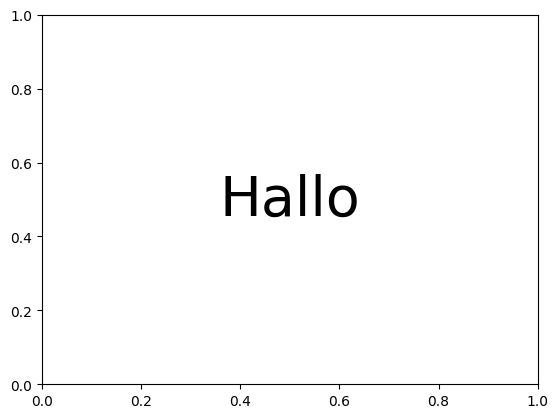

In [26]:
# Text im Diagramm platzieren
# Das erste Argument ist der Text, ha ist die horizontale Ausrichtung, 
# va ist die vertikale Ausrichtung, xy sind die Koordinaten des Punktes,
# xytext sind die Koordinaten des Textes (wenn der Text vom Punkt entfernt sein soll)
fig, ax = plt.subplots()
ax.annotate(text='Hallo',
			xy=(0.5, 0.5),
			fontsize=40,
			ha='center',
			va='center',
			xytext=(0.5, 0.5))
plt.show()

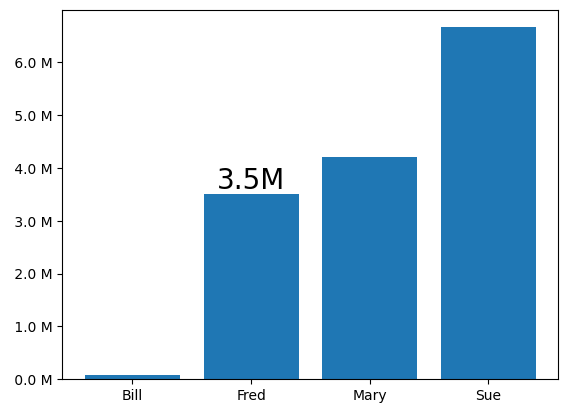

In [27]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

# Daten zu Kontoständen und Besitzern
accounts = {'Bill': 0.815e5,
			'Fred': 3.50e6,
			'Mary': 4.20e6,
			'Sue': 6.66e6}

ax.bar(accounts.keys(), accounts.values())

# Wie können wir die Zahl anheben?
# > Durch Addition von einer Zahl zu Freds Kontostand!
ax.annotate(text=format(accounts.get('Fred') / 1e6, ".1f") + "M",
			xy=(1, accounts.get('Fred') + 100_000),
			ha='center',
			fontsize=20)

plt.show()

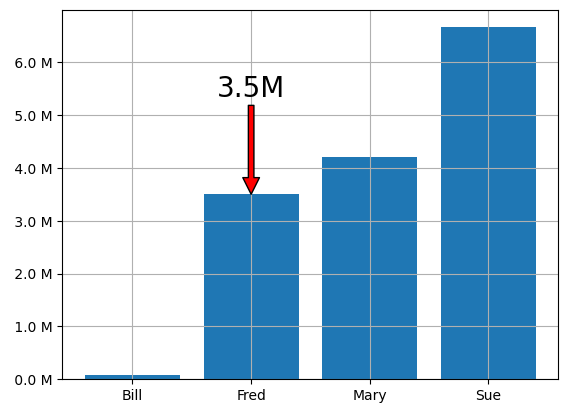

In [28]:
# Arrow = Pfeil, props ist Kurzform von Properties = Eigenschaften
# arrowprops > Pfeileigenschaften
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

# Daten zu Kontoständen und Besitzern
accounts = {'Bill': 0.815e5,
			'Fred': 3.50e6,
			'Mary': 4.20e6,
			'Sue': 6.66e6}

ax.bar(accounts.keys(), accounts.values())

ax.annotate(text=format(accounts['Fred'] / 1e6, ".1f") + "M",
			xy=(1, accounts['Fred']),
			xytext=(1, accounts['Fred'] + 2e6),
			ha='center',
			va='center',
			fontsize=20,
			arrowprops={"facecolor": 'red'}
			)

plt.grid();

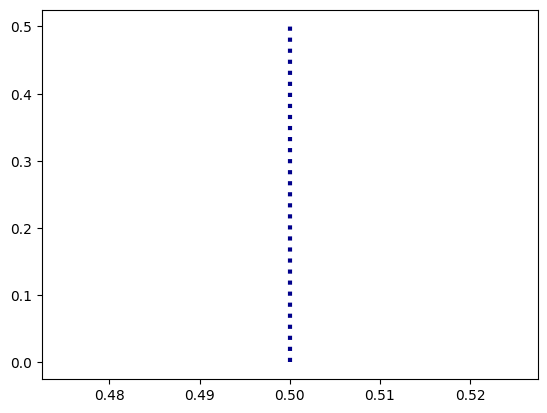

In [29]:
# Vertikale-Linie mit X-Koordinate, Min- und 
# Max-Bereich mit Y- und eigenen Eigenschaften hinzufügen
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
fig, ax = plt.subplots()
ax.vlines(
	x=0.5,
	ymin=0,
	ymax=0.5,
	color='darkblue',
	lw=3,
	ls=':'
);

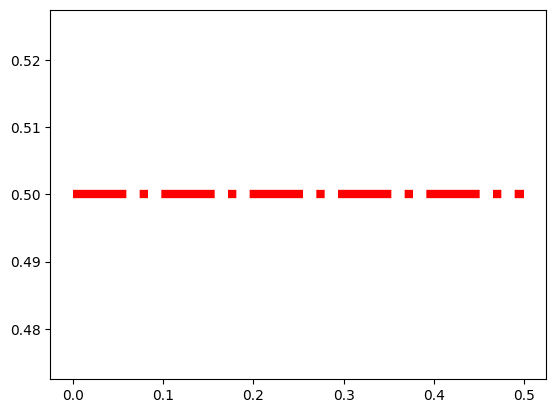

In [30]:
# Horizontale-Linie mit Y-Koordinate, Min- und
# Max-Bereiche mit x- und eigenen Eigenschaften hinzufügen
fig, ax = plt.subplots()
ax.hlines(
	y=0.5,
	xmin=0,
	xmax=0.5,
	color='red',
	lw=6,
	ls='-.'
);

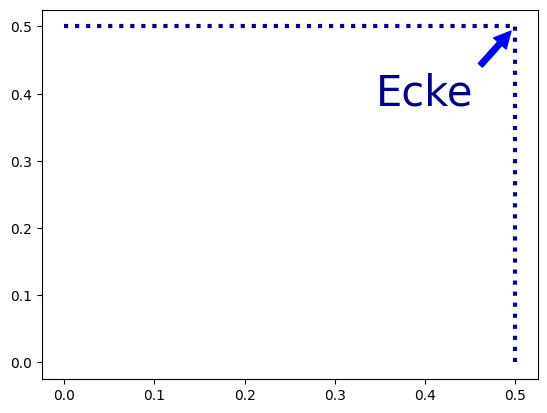

In [31]:
# Anmerkung, v-Linien und h-Linien gemeinsam
fig, ax = plt.subplots()

ax.vlines(x=0.5,
		  ymin=0,
		  ymax=0.5,
		  ls=':',
		  lw=3,
		  color='darkblue')

ax.hlines(y=0.5,
		  xmin=0,
		  xmax=0.5,
		  ls=':',
		  lw=3,
		  color='darkblue')

ax.annotate(text='Ecke',
			xy=(0.5, 0.5),
			xytext=(0.4, 0.4),
			color='darkblue',
			fontsize=30,
			ha="center",
			va="center",
			arrowprops={"color": "blue",
						"shrink": 0.1});

### Übung:

Nutze den Datensatz "abi_vs_mathe.xlsx" und erstelle aus den Messdaten einen Scatterplot. Identifiziere in diesem Scatterplot den Ausreißer, zeige auf diesen mit einer horizontalen und vertikalen durchgezogenenen (kein dash) Linie und schreibe die Personennummer dieser Person (wenn es Person 2 wäre also zum Beispiel: "Pers-Nr.: 2").


In [66]:
# read data, convert to DF
abi_uni = pd.read_excel("abi_vs_uni.xlsx")
abi_uni

,Person,Abinote,Mathenote
0,1,2.7,3.3
1,2,2.3,2.7
2,3,1.0,1.3
3,4,3.0,3.3
4,5,2.3,2.7
5,6,2.7,2.3
6,7,2.3,2.0
7,8,3.0,3.3
8,9,3.0,2.7
9,10,3.0,3.3


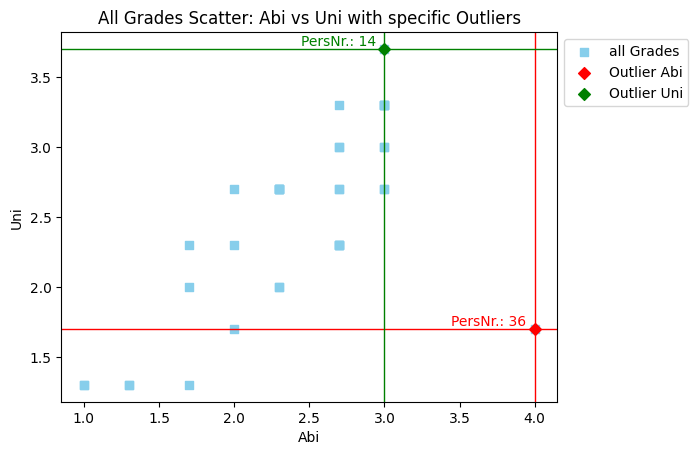

In [124]:
# fig, ax
fig, ax = plt.subplots()
ax.scatter(abi_uni["Abinote"], abi_uni["Mathenote"], label="all Grades", color="skyblue", marker="s")

# define outliers
outlier_abi = abi_uni[abi_uni["Person"] == 36].iloc[0]
outlier_uni = abi_uni[abi_uni["Person"] == 14].iloc[0]

# mark outliers
ax.scatter(outlier_abi["Abinote"], outlier_abi["Mathenote"], color="red", zorder=5, label="Outlier Abi", marker="D")
ax.scatter(outlier_uni["Abinote"], outlier_uni["Mathenote"], color="green", zorder=5, label="Outlier Uni", marker="D")

# line for outlier abi
ax.axhline(y=outlier_abi["Mathenote"], color="red", linestyle="-", lw=1)
ax.axvline(x=outlier_abi["Abinote"], color="red", linestyle="-", lw=1)

# line for outlier uni
ax.axhline(y=outlier_uni["Mathenote"], color="green", linestyle="-", lw=1)
ax.axvline(x=outlier_uni["Abinote"], color="green", linestyle="-", lw=1)

# annotation outliers
ax.annotate(
	f"PersNr.: {int(outlier_abi['Person'])}",
	xy=(outlier_abi["Abinote"], outlier_abi["Mathenote"]),
	xytext=(-60, 10),
	textcoords="offset points",
	ha="left",
	va="top",
	color="red"
)

ax.annotate(
	f"PersNr.: {int(outlier_uni['Person'])}",
	xy=(outlier_uni["Abinote"], outlier_uni["Mathenote"]),
	xytext=(-60, 10),
	textcoords="offset points",
	ha="left",
	va="top",
	color="green"
)

ax.set_xlabel("Abi")
ax.set_ylabel("Uni")
ax.set_title("All Grades Scatter: Abi vs Uni with specific Outliers")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# 4. Merkblatt für alle Plot-Elemente

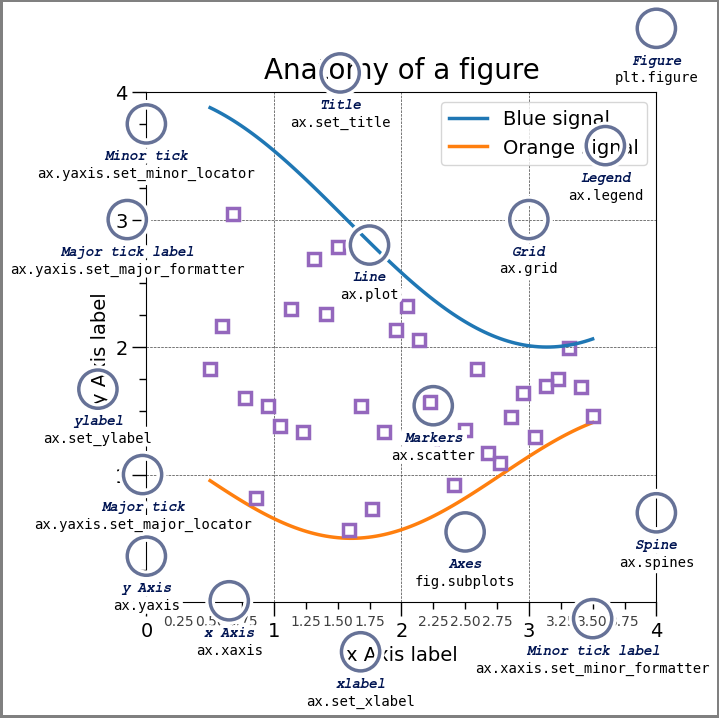

In [125]:
# Aus der Matplotlib-Dokumentation:
from matplotlib.patches import \
	Circle  # Low-level Zeichenfunktionen (hier: Kreis)
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

royal_blue = [0, 20 / 256, 82 / 256]

# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
			   labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
		marker='s', markerfacecolor='none', markeredgecolor='C4',
		markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
	# Circle marker
	c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
			   edgecolor=royal_blue + [0.6], facecolor='none',
			   path_effects=[withStroke(linewidth=7, foreground='white')])
	ax.add_artist(c)

	# use path_effects as a background for the texts
	# draw the path_effects and the colored text separately so that the
	# path_effects cannot clip other texts
	for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
		color = 'white' if path_effects else royal_blue
		ax.text(x, y - 0.2, text, zorder=100,
				ha='center', va='top', weight='bold', color=color,
				style='italic', fontfamily='Courier New',
				path_effects=path_effects)

		color = 'white' if path_effects else 'black'
		ax.text(x, y - 0.33, code, zorder=100,
				ha='center', va='top', weight='normal', color=color,
				fontfamily='monospace', fontsize='medium',
				path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()
fig.savefig("CheatSheetPltFigure.svg")